# EDA of Posts Table

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df_posts = pd.read_xml(r"D:/mada/programming/Datasets/Stack over flaw/Posts.xml", parser="etree")

In [4]:
len(df_posts['Id'].unique())

415913

In [ ]:
df_posts

In [9]:
pd.set_option('display.max_columns', None)  # Show all columns
df_posts.head(20)

,Id,PostTypeId,AcceptedAnswerId,CreationDate,Score,ViewCount,Body,OwnerUserId,LastActivityDate,Title,Tags,AnswerCount,CommentCount,ContentLicense,LastEditorDisplayName,LastEditDate,LastEditorUserId,CommunityOwnedDate,ParentId,OwnerDisplayName,ClosedDate,FavoriteCount
0,1,1,15.0,2010-07-19T19:12:12.510,52,5571.0,<p>How should I elicit prior distributions fro...,8.0,2023-07-14T08:18:31.703,Eliciting priors from experts,<bayesian><prior><elicitation>,6.0,2,CC BY-SA 2.5,None,None,NaN,None,NaN,None,None,NaN
1,2,1,59.0,2010-07-19T19:12:57.157,34,33737.0,<p>In many different statistical methods there...,24.0,2022-11-23T13:03:42.033,What is normality?,<distributions><normality-assumption>,7.0,1,CC BY-SA 2.5,user88,2010-08-07T17:56:44.800,NaN,None,NaN,None,None,NaN
2,3,1,5.0,2010-07-19T19:13:28.577,71,6662.0,<p>What are some valuable Statistical Analysis...,18.0,2022-11-27T23:33:13.540,What are some valuable Statistical Analysis op...,<software><open-source>,19.0,3,CC BY-SA 2.5,None,2011-02-12T05:50:03.667,183.0,2010-07-19T19:13:28.577,NaN,None,None,NaN
3,4,1,135.0,2010-07-19T19:13:31.617,23,46243.0,<p>I have two groups of data. Each with a dif...,23.0,2010-09-08T03:00:19.690,Assessing the significance of differences in d...,<distributions><statistical-significance>,5.0,2,CC BY-SA 2.5,None,None,NaN,None,NaN,None,None,NaN
4,5,2,NaN,2010-07-19T19:14:43.050,90,NaN,"<p>The R-project</p>\n\n<p><a href=""http://www...",23.0,2010-07-19T19:21:15.063,None,None,NaN,3,CC BY-SA 2.5,None,2010-07-19T19:21:15.063,23.0,2010-07-19T19:14:43.050,3.0,None,None,NaN
5,6,1,NaN,2010-07-19T19:14:44.080,489,174104.0,"<p>Last year, I read a blog post from <a href=...",5.0,2021-01-19T17:59:15.653,The Two Cultures: statistics vs. machine learn...,<machine-learning><pac-learning>,20.0,10,CC BY-SA 3.0,None,2017-04-08T17:58:18.247,11887.0,2010-08-09T13:05:50.603,NaN,None,None,NaN
6,7,1,18.0,2010-07-19T19:15:59.303,103,42582.0,<p>I've been working on a new method for analy...,38.0,2022-11-30T05:37:29.877,Locating freely available data samples,<dataset><sample><population><teaching>,25.0,2,CC BY-SA 2.5,None,2013-09-26T21:50:36.963,253.0,2010-07-20T20:50:48.483,NaN,None,None,NaN
7,9,2,NaN,2010-07-19T19:16:27.553,15,NaN,"<p><a href=""http://incanter.org/"">Incanter</a>...",50.0,2010-07-19T19:16:27.553,None,None,NaN,3,CC BY-SA 2.5,None,None,NaN,2010-07-19T19:16:27.553,3.0,None,None,NaN
8,10,1,1887.0,2010-07-19T19:17:47.537,64,120531.0,<p>Many studies in the social sciences use Lik...,24.0,2021-02-04T18:28:52.953,Under what conditions should Likert scales be ...,<ordinal-data><likert><scales><measurement>,4.0,4,CC BY-SA 2.5,None,2017-01-26T11:52:53.043,28666.0,None,NaN,None,None,NaN
9,11,1,1201.0,2010-07-19T19:18:30.810,5,358.0,"<p>Is there a good, modern treatment covering ...",34.0,2010-08-03T21:50:09.007,Multivariate Interpolation Approaches,<multivariable><interpolation>,1.0,2,CC BY-SA 2.5,None,2010-07-28T07:58:52.320,34.0,None,NaN,None,None,NaN


In [8]:
df_posts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 415913 entries, 0 to 415912
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Id                     415913 non-null  int64  
 1   PostTypeId             415913 non-null  int64  
 2   AcceptedAnswerId       69774 non-null   float64
 3   CreationDate           415913 non-null  object 
 4   Score                  415913 non-null  int64  
 5   ViewCount              209721 non-null  float64
 6   Body                   415377 non-null  object 
 7   OwnerUserId            409899 non-null  float64
 8   LastActivityDate       415913 non-null  object 
 9   Title                  209721 non-null  object 
 10  Tags                   209721 non-null  object 
 11  AnswerCount            209721 non-null  float64
 12  CommentCount           415913 non-null  int64  
 13  ContentLicense         415913 non-null  object 
 14  LastEditorDisplayName  4035 non-null

In [10]:
pd.set_option('display.max_colwidth', None)  # Show full column content

In [11]:
df_nulluserID = df_posts[df_posts['OwnerUserId'].isna()]

In [12]:
df_nulluserID.head(100
                   )

,Id,PostTypeId,AcceptedAnswerId,CreationDate,Score,ViewCount,Body,OwnerUserId,LastActivityDate,Title,Tags,AnswerCount,CommentCount,ContentLicense,LastEditorDisplayName,LastEditDate,LastEditorUserId,CommunityOwnedDate,ParentId,OwnerDisplayName,ClosedDate,FavoriteCount
15,17,1,29.0,2010-07-19T19:24:12.187,12,1933.0,"<p>I have four competing models which I use to predict a binary outcome variable (say, employment status after graduating, 1 = employed, 0 = not-employed) for n subjects. A natural metric of model performance is hit rate which is the percentage of correct predictions for each one of the models. </p>\n\n<p>It seems to me that I cannot use ANOVA in this setting as the data violates the assumptions underlying ANOVA. Is there an equivalent procedure I could use instead of ANOVA in the above setting to test for the hypothesis that all four models are equally effective?</p>\n",NaN,2012-01-22T23:34:51.837,How can I adapt ANOVA for binary data?,<anova><chi-squared-test><generalized-linear-model>,1.0,0,CC BY-SA 2.5,None,2012-01-22T23:34:51.837,7972.0,None,NaN,user28,None,NaN
25,28,2,NaN,2010-07-19T19:28:12.830,7,NaN,"<p><a href=""http://www.gnu.org/software/gsl/"" rel=""nofollow noreferrer"">GSL</a> for those of you who wish to program in C / C++ is a valuable resource as it provides several routines for random generators, linear algebra etc. While GSL is primarily available for Linux there are also ports for Windows (See: <a href=""https://web.archive.org/web/20110817071546/http://gladman.plushost.co.uk/oldsite/computing/gnu_scientific_library.php"" rel=""nofollow noreferrer"">this</a> and <a href=""http://david.geldreich.free.fr/dev.html"" rel=""nofollow noreferrer"">this</a>).</p>\n",NaN,2022-11-27T23:14:52.687,None,None,NaN,0,CC BY-SA 4.0,None,2022-11-27T23:14:52.687,362671.0,2010-07-19T19:28:12.830,3.0,user28,None,NaN
49,56,2,NaN,2010-07-19T19:42:28.040,261,NaN,"<p>Here is how I would explain the basic difference to my grandma:</p>\n\n<p>I have misplaced my phone somewhere in the home. I can use the phone locator on the base of the instrument to locate the phone and when I press the phone locator the phone starts beeping.</p>\n\n<p>Problem: Which area of my home should I search?</p>\n\n<h2>Frequentist Reasoning</h2>\n\n<p>I can hear the phone beeping. I also have a mental model which helps me identify the area from which the sound is coming. Therefore, upon hearing the beep, I infer the area of my home I must search to locate the phone.</p>\n\n<h2>Bayesian Reasoning</h2>\n\n<p>I can hear the phone beeping. Now, apart from a mental model which helps me identify the area from which the sound is coming from, I also know the locations where I have misplaced the phone in the past. So, I combine my inferences using the beeps and my prior information about the locations I have misplaced the phone in the past to identify an area I must search to locate the phone.</p>\n",NaN,2016-01-16T19:14:26.703,None,None,NaN,11,CC BY-SA 3.0,None,2016-01-16T19:14:26.703,100906.0,None,22.0,user28,None,NaN
66,74,2,NaN,2010-07-19T19:51:34.287,78,NaN,"<p>In such a discussion, I always recall the famous Ken Thompson quote </p>\n\n<blockquote>\n <p>When in doubt, use brute force.</p>\n</blockquote>\n\n<p>In this case, machine learning is a salvation when the assumptions are hard to catch; or at least it is much better than guessing them wrong. </p>\n",NaN,2010-07-19T19:51:34.287,None,None,NaN,2,CC BY-SA 2.5,None,None,NaN,None,6.0,user88,None,NaN
82,94,2,NaN,2010-07-19T20:18:24.520,5,NaN,"<p>Quick R site is basic, but quite nice for start <a href=""http://www.statmethods.net/index.html"">http://www.statmethods.net/index.html</a> . </p>\n",NaN,2010-07-19T20:18:24.520,None,None,NaN,0,CC BY-SA 2.5,None,None,NaN,2010-10-19T11:13:59.663,75.0,user88,None,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
829,886,1,934.0,2010-07-28T11:31:59.857,21,16523.0,"<p>The 'fundamental' idea of statistics for estimating pa

In [23]:
df_posts['ParentId'].count()

203244

In [34]:
df_posts[df_posts['PostTypeId']==1].count()

Id                       209721
PostTypeId               209721
AcceptedAnswerId          69774
CreationDate             209721
Score                    209721
ViewCount                209721
Body                     209721
OwnerUserId              206263
LastActivityDate         209721
Title                    209721
Tags                     209721
AnswerCount              209721
CommentCount             209721
ContentLicense           209721
LastEditorDisplayName      3102
LastEditDate             127618
LastEditorUserId         124779
CommunityOwnedDate         1209
ParentId                      0
OwnerDisplayName           6480
ClosedDate                15699
FavoriteCount              5341
dtype: int64

In [32]:
df_posts[df_posts['OwnerDisplayName'].notna()].loc[:,'OwnerDisplayName']

15              user28
25              user28
49              user28
66              user88
82              user88
              ...     
415635         Andrew 
415707       macramole
415764    katib sareeh
415870      Hakan Egne
415895        edamondo
Name: OwnerDisplayName, Length: 10202, dtype: object

In [33]:
df_posts[df_posts['CommunityOwnedDate'].notna()]

Id  PostTypeId  AcceptedAnswerId             CreationDate  Score  \
2            3           1               5.0  2010-07-19T19:13:28.577     71   
4            5           2               NaN  2010-07-19T19:14:43.050     90   
5            6           1               NaN  2010-07-19T19:14:44.080    489   
6            7           1              18.0  2010-07-19T19:15:59.303    103   
7            9           2               NaN  2010-07-19T19:16:27.553     15   
...        ...         ...               ...                      ...    ...   
414004  623309           2               NaN  2023-08-06T09:12:42.540      6   
414010  623318           2               NaN  2023-08-06T12:05:19.143      3   
414115  623444           2               NaN  2023-08-08T05:27:41.540      0   
415359  624946           2               NaN  2023-08-25T23:41:15.257      2   
415729  625357           1               NaN  2023-08-31T03:33:05.027      2   

        ViewCount  \
2          6662.0   
4             NaN   
5        174104.0   
6         42582.0   
7             NaN   
...           ...   
414004        NaN   
414010        NaN   
414115        NaN   
415359        NaN   
415729      209.0   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              

In [ ]:
df_posts[df_posts['FavoriteCount'].()]

,Id,PostTypeId,AcceptedAnswerId,CreationDate,Score,ViewCount,Body,OwnerUserId,LastActivityDate,Title,Tags,AnswerCount,CommentCount,ContentLicense,LastEditorDisplayName,LastEditDate,LastEditorUserId,CommunityOwnedDate,ParentId,OwnerDisplayName,ClosedDate,FavoriteCount
0,1,1,15.0,2010-07-19T19:12:12.510,52,5571.0,<p>How should I elicit prior distributions from experts when fitting a Bayesian model?</p>\n,8.0,2023-07-14T08:18:31.703,Eliciting priors from experts,<bayesian><prior><elicitation>,6.0,2,CC BY-SA 2.5,None,None,NaN,None,NaN,None,None,NaN
1,2,1,59.0,2010-07-19T19:12:57.157,34,33737.0,"<p>In many different statistical methods there is an ""assumption of normality"". What is ""normality"" and how do I know if there is normality?</p>\n",24.0,2022-11-23T13:03:42.033,What is normality?,<distributions><normality-assumption>,7.0,1,CC BY-SA 2.5,user88,2010-08-07T17:56:44.800,NaN,None,NaN,None,None,NaN
2,3,1,5.0,2010-07-19T19:13:28.577,71,6662.0,"<p>What are some valuable Statistical Analysis open source projects available right now?</p>\n\n<p>Edit: as pointed out by Sharpie, valuable could mean helping you get things done faster or more cheaply.</p>\n",18.0,2022-11-27T23:33:13.540,What are some valuable Statistical Analysis open source projects?,<software><open-source>,19.0,3,CC BY-SA 2.5,None,2011-02-12T05:50:03.667,183.0,2010-07-19T19:13:28.577,NaN,None,None,NaN
3,4,1,135.0,2010-07-19T19:13:31.617,23,46243.0,<p>I have two groups of data. Each with a different distribution of multiple variables. I'm trying to determine if these two groups' distributions are different in a statistically significant way. I have the data in both raw form and binned up in easier to deal with discrete categories with frequency counts in each. </p>\n\n<p>What tests/procedures/methods should I use to determine whether or not these two groups are significantly different and how do I do that in SAS or R (or Orange)?</p>\n,23.0,2010-09-08T03:00:19.690,Assessing the significance of differences in distributions,<distributions><statistical-significance>,5.0,2,CC BY-SA 2.5,None,None,NaN,None,NaN,None,None,NaN
4,5,2,NaN,2010-07-19T19:14:43.050,90,NaN,"<p>The R-project</p>\n\n<p><a href=""http://www.r-project.org/"">http://www.r-project.org/</a></p>\n\n<p>R is valuable and significant because it was the first widely-accepted Open-Source alternative to big-box packages. It's mature, well supported, and a standard within many scientific communities.</p>\n\n<ul>\n<li><a href=""http://www.inside-r.org/why-use-r"">Some reasons why it is useful and valuable</a> </li>\n<li>There are some nice tutorials <a href=""http://gettinggeneticsdone.blogspot.com/search/label/ggplot2"">here</a>.</li>\n</ul>\n",23.0,2010-07-19T19:21:15.063,None,None,NaN,3,CC BY-SA 2.5,None,2010-07-19T19:21:15.063,23.0,2010-07-19T19:14:43.050,3.0,None,None,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
415908,625555,2,NaN,2023-09-03T00:50:23.070,0,NaN,"<p>Without reference to any specific algorithm:</p>\n<p>Information about similarity among users are already encoded in the item matrix <span class=""math-container"">$A$</span> in the case of <a href=""https://en.wikipedia.org/wiki/Item-item_collaborative_filtering"" rel=""nofollow noreferrer"">item-item collaborative filtering</a> (CF).If there are <span class=""math-container"">$N$</span> items over columns and <span class=""math-container"">$M$</span> users over rows. Once CF algorithm is applied and entire matrix is known, columns of transpose of <span class=""math-container"">$B=A^{T}$</span> can generate similarity scores. User's preferences live in the <span class=""math-container"">$ColumnSpan(B)$</span> space.</p>\n",254337.0,2023-09-03T00:50:23.070,None,None,NaN,0,CC BY-SA 4.0,None,None,NaN,None,624964.0,None,None,NaN
415909,625556,1,NaN,2023-09-03T01:51:02.043,0,6.0,"<p>I am trying to code the partial log-likelihood function for the proportional hazards model with a time varying covariate 

In [39]:
df_posts.isna().sum()

Id                            0
PostTypeId                    0
AcceptedAnswerId         346139
CreationDate                  0
Score                         0
ViewCount                206192
Body                        536
OwnerUserId                6014
LastActivityDate              0
Title                    206192
Tags                     206192
AnswerCount              206192
CommentCount                  0
ContentLicense                0
LastEditorDisplayName    411878
LastEditDate             205534
LastEditorUserId         209215
CommunityOwnedDate       410277
ParentId                 212669
OwnerDisplayName         405711
ClosedDate               400214
FavoriteCount            410572
dtype: int64

In [8]:
df_posts[df_posts['PostTypeId']==3].count()

Id                       6
PostTypeId               6
AcceptedAnswerId         0
CreationDate             6
Score                    6
ViewCount                0
Body                     3
OwnerUserId              6
LastActivityDate         6
Title                    0
Tags                     0
AnswerCount              0
CommentCount             6
ContentLicense           6
LastEditorDisplayName    0
LastEditDate             6
LastEditorUserId         6
CommunityOwnedDate       0
ParentId                 0
OwnerDisplayName         0
ClosedDate               0
FavoriteCount            0
dtype: int64

In [42]:
df_posts[df_posts['PostTypeId']==3]

,Id,PostTypeId,AcceptedAnswerId,CreationDate,Score,ViewCount,Body,OwnerUserId,LastActivityDate,Title,Tags,AnswerCount,CommentCount,ContentLicense,LastEditorDisplayName,LastEditDate,LastEditorUserId,CommunityOwnedDate,ParentId,OwnerDisplayName,ClosedDate,FavoriteCount
8156,8981,3,NaN,2011-03-30T19:23:14.790,0,NaN,"<p>""Statistics"" can refer variously to the (wide) field of statistical theory and statistical analysis; to constructing functions of data as used in formal procedures; to collections of data; and to summaries of data.</p>\n\n<p>Because this site is about statistics and statistical analysis, it is rare that tagging a question with ""statistics"" will be informative. Use of this tag will signal that your question is extremely general and broad.</p>\n",-1.0,2011-03-30T19:23:14.790,None,None,NaN,0,CC BY-SA 2.5,None,2011-03-30T19:23:14.790,919.0,None,NaN,None,None,NaN
8157,8982,3,NaN,2011-03-30T19:23:14.790,0,NaN,"This generic tag is only rarely suitable; use it with caution. Consider selecting more specific, descriptive tags.",-1.0,2011-03-30T19:23:14.790,None,None,NaN,0,CC BY-SA 2.5,None,2011-03-30T19:23:14.790,919.0,None,NaN,None,None,NaN
8941,9857,3,NaN,2011-04-22T06:59:10.240,0,NaN,NaN,-1.0,2011-04-22T06:59:10.240,None,None,NaN,0,CC BY-SA 3.0,None,2011-04-22T06:59:10.240,-1.0,None,NaN,None,None,NaN
8942,9858,3,NaN,2011-04-22T06:59:10.240,0,NaN,Linear regression is a type of regression when regression function is linear. It is most widely used regression type.,-1.0,2011-04-22T09:24:38.193,None,None,NaN,0,CC BY-SA 3.0,None,2011-04-22T09:24:38.193,2116.0,None,NaN,None,None,NaN
9189,10130,3,NaN,2011-04-29T00:18:02.670,0,NaN,NaN,-1.0,2011-04-29T00:18:02.670,None,None,NaN,0,CC BY-SA 3.0,None,2011-04-29T00:18:02.670,-1.0,None,NaN,None,None,NaN
9190,10131,3,NaN,2011-04-29T00:18:02.670,0,NaN,NaN,-1.0,2011-04-29T00:18:02.670,None,None,NaN,0,CC BY-SA 3.0,None,2011-04-29T00:18:02.670,-1.0,None,NaN,None,None,NaN


In [49]:
df_posts[df_posts['PostTypeId']==4]

,Id,PostTypeId,AcceptedAnswerId,CreationDate,Score,ViewCount,Body,OwnerUserId,LastActivityDate,Title,Tags,AnswerCount,CommentCount,ContentLicense,LastEditorDisplayName,LastEditDate,LastEditorUserId,CommunityOwnedDate,ParentId,OwnerDisplayName,ClosedDate,FavoriteCount
2166,2331,4,NaN,2010-09-03T07:25:03.153,0,NaN,"Use this tag for any *on-topic* question that (a) involves `R` either as a critical part of the question or expected answer, & (b) is not *just* about how to use `R`.",183.0,2016-01-15T23:25:24.240,None,None,NaN,0,CC BY-SA 3.0,None,2016-01-15T23:25:24.240,7290.0,None,NaN,None,None,NaN
2248,2417,4,NaN,2010-09-06T18:24:38.507,0,NaN,Mixed (aka multilevel or hierarchical) models are linear models that include both fixed effects and random effects. They are used to model longitudinal or nested data.,NaN,2015-12-15T01:07:11.833,None,None,NaN,0,CC BY-SA 3.0,None,2015-12-15T01:07:11.833,28666.0,None,NaN,user88,None,NaN
2402,2601,4,NaN,2010-09-12T20:54:55.157,0,NaN,Psychometrics has evolved as a subfield of psychology to become the science of measurement of unobservable individual characteristics.,930.0,2010-09-12T20:54:55.157,None,None,NaN,0,CC BY-SA 2.5,None,2010-09-12T20:54:55.157,930.0,None,NaN,None,None,NaN
2759,3013,4,NaN,2010-09-23T10:59:13.660,0,NaN,"Model selection is a problem of judging which model from some set performs best. Popular methods include $R^2$, AIC and BIC criteria, test sets, and cross-validation. To some extent, feature selection is a subproblem of model selection.",NaN,2011-06-15T03:58:08.313,None,None,NaN,0,CC BY-SA 3.0,None,2011-06-15T03:58:08.313,919.0,None,NaN,user88,None,NaN
2761,3015,4,NaN,2010-09-23T11:06:19.013,0,NaN,"Cluster analysis is the task of partitioning data into subsets of objects according to their mutual ""similarity,"" without using preexisting knowledge such as class labels. [Clustered-standard-errors and/or cluster-samples should be tagged as such; do NOT use the ""clustering"" tag for them.]",NaN,2016-03-09T10:33:39.543,None,None,NaN,0,CC BY-SA 3.0,None,2016-03-09T10:33:39.543,3277.0,None,NaN,user88,None,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
408807,616844,4,NaN,2023-05-24T22:22:46.573,0,NaN,Generalized additive latent and mixed models (GALAMMs) are structural equation modeling (SEM) based models which freely include nonlinear and clustered data analysis.,345611.0,2023-05-25T03:38:43.217,None,None,NaN,0,CC BY-SA 4.0,None,2023-05-25T03:38:43.217,345611.0,None,NaN,None,None,NaN
409678,617961,4,NaN,2023-06-05T23:50:44.943,0,NaN,A piecewise function is a function that is defined by a sequence of intervals.,345611.0,2023-06-06T01:47:10.827,None,None,NaN,0,CC BY-SA 4.0,None,2023-06-06T01:47:10.827,345611.0,None,NaN,None,None,NaN
411626,620383,4,NaN,2023-07-03T09:53:21.123,0,NaN,"Sourav Chatterjee (Journal, American Statistical Association 106: 2009-2022 (2021)) proposed a correlation coefficient which has limits 0 if and only if two variables are independent and 1 if and only if one variable is a a measurable function of the other. He used the symbol xi and the name xicor for a R package written with Susan Holmes.",22047.0,2023-07-03T09:53:21.123,None,None,NaN,0,CC BY-SA 4.0,None,2023-07-03T09:53:21.123,22047.0,None,NaN,None,None,NaN
412798,621849,4,NaN,2023-07-20T14:06:06.383,0,NaN,A specific log-likelihood ratio used in information theory,11887.0,2023-07-20T14:06:06.383,None,None,NaN,0,CC BY-SA 4.0,None,2023-07-20T14:06:06.383,11887.0,None,NaN,None,None,NaN


In [1]:
df_posts[df_posts['PostTypeId']==3].count()

NameError: name 'df_posts' is not defined

In [51]:
df_posts[df_posts['PostTypeId']==4].loc[:,'Body']

2166                                                                                                                                                                                       Use this tag for any *on-topic* question that (a) involves `R` either as a critical part of the question or expected answer, & (b) is not *just* about how to use `R`.
2248                                                                                                                                                                                      Mixed (aka multilevel or hierarchical) models are linear models that include both fixed effects and random effects. They are used to model longitudinal or nested data.
2402                                                                                                                                                                                                                       Psychometrics has evolved as a subfield of psychology to become the scien

In [52]:
df_posts[df_posts['PostTypeId']==5].count()

Id                       1457
PostTypeId               1457
AcceptedAnswerId            0
CreationDate             1457
Score                    1457
ViewCount                   0
Body                      942
OwnerUserId              1446
LastActivityDate         1457
Title                       0
Tags                        0
AnswerCount                 0
CommentCount             1457
ContentLicense           1457
LastEditorDisplayName      10
LastEditDate             1457
LastEditorUserId         1452
CommunityOwnedDate          1
ParentId                    0
OwnerDisplayName           11
ClosedDate                  0
FavoriteCount               0
dtype: int64

In [54]:
df_posts[df_posts['PostTypeId']==5]

Id  PostTypeId  AcceptedAnswerId             CreationDate  Score  \
2095      2254           5               NaN  2010-08-30T10:31:13.000      0   
2247      2416           5               NaN  2010-09-06T18:24:38.507      0   
2401      2600           5               NaN  2010-09-12T20:54:55.157      0   
2758      3012           5               NaN  2010-09-23T10:59:13.660      0   
2760      3014           5               NaN  2010-09-23T11:06:19.013      0   
...        ...         ...               ...                      ...    ...   
408806  616843           5               NaN  2023-05-24T22:22:46.573      0   
409677  617960           5               NaN  2023-06-05T23:50:44.943      0   
411625  620382           5               NaN  2023-07-03T09:53:21.123      0   
412797  621848           5               NaN  2023-07-20T14:06:06.383      0   
414127  623461           5               NaN  2023-08-08T08:42:13.463      0   

        ViewCount  \
2095          NaN   
2247          NaN   
2401          NaN   
2758          NaN   
2760          NaN   
...           ...   
408806        NaN   
409677        NaN   
411625        NaN   
412797        NaN   
414127        NaN   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              

In [ ]:
df_posts[df_posts['PostTypeId']==6].count()

Id                       23
PostTypeId               23
AcceptedAnswerId          0
CreationDate             23
Score                    23
ViewCount                 0
Body                     23
OwnerUserId              21
LastActivityDate         23
Title                     0
Tags                      0
AnswerCount               0
CommentCount             23
ContentLicense           23
LastEditorDisplayName     2
LastEditDate             23
LastEditorUserId         21
CommunityOwnedDate       23
ParentId                  0
OwnerDisplayName          2
ClosedDate                0
FavoriteCount             0
dtype: int64

In [58]:
df_posts[df_posts['CommunityOwnedDate'].notna()].count()

Id                       5636
PostTypeId               5636
AcceptedAnswerId          433
CreationDate             5636
Score                    5636
ViewCount                1209
Body                     5636
OwnerUserId              5451
LastActivityDate         5636
Title                    1209
Tags                     1209
AnswerCount              1209
CommentCount             5636
ContentLicense           5636
LastEditorDisplayName      90
LastEditDate             2570
LastEditorUserId         2495
CommunityOwnedDate       5636
ParentId                 4403
OwnerDisplayName          210
ClosedDate                188
FavoriteCount              20
dtype: int64

In [57]:
df_posts[df_posts['PostTypeId']==6]

,Id,PostTypeId,AcceptedAnswerId,CreationDate,Score,ViewCount,Body,OwnerUserId,LastActivityDate,Title,Tags,AnswerCount,CommentCount,ContentLicense,LastEditorDisplayName,LastEditDate,LastEditorUserId,CommunityOwnedDate,ParentId,OwnerDisplayName,ClosedDate,FavoriteCount
6577,7215,6,NaN,2011-02-14T21:19:12.923,0,NaN,"<p>I have been one of the pro tem moderators and I would like to continue my mission as a regular mod.</p>\n\n<p>So, if you like what I was doing here (compulsive edits, protecting wide scope, journal club), vote for me!</p>\n",NaN,2011-02-14T21:19:12.923,None,None,NaN,2,CC BY-SA 2.5,user88,2011-02-14T21:19:12.923,NaN,2011-02-14T21:19:12.923,NaN,user88,None,NaN
6698,7346,6,NaN,2011-02-17T21:56:24.370,0,NaN,"<p>I did not participate to the beta, but I have been very happy to contribute (Q&amp;A, edits, votes, etc.) during the last six months. Despite being also very happy with our actual moderators, I would like to propose myself for fulfilling this task if one of them feel the need to get some time off.</p>\n\n<p>Needless to say, I will vote for them if they nominate themselves for a second round.</p>\n",930.0,2011-02-17T21:56:24.370,None,None,NaN,4,CC BY-SA 2.5,None,2011-02-17T21:56:24.370,930.0,2011-02-17T21:56:24.370,NaN,None,None,NaN
6737,7386,6,NaN,2011-02-18T22:29:42.007,0,NaN,"<p>I am reluctant to make this nomination because I have been happy with the moderators. I would be delighted to see them continue in their roles.</p>\n\n<p>However, to date only two people have entered nominations. (Is everyone else waiting until just before the deadline?) As you might guess from my activity here, I value this forum and hope to see it attract many more participants. </p>\n\n<p>As part of this self-nomination process, we're supposed to say a little about our qualifications. The statistics about my participation here are clear enough; there's no need to dwell on that. I have successfully nurtured technical online communities (via listservers--remember them?--and a Web magazine) and greatly enjoyed how they fostered collegial, productive interchanges. I have long believed strongly in contributing original content to the Web (rather than just copying bits and pieces of other stuff) and in the power of communities of collaborators. This site combines both those tenets, in a good way. Let's all keep contributing as much as we can to keep it growing and successful.</p>\n",919.0,2011-02-18T22:29:42.007,None,None,NaN,3,CC BY-SA 2.5,None,2011-02-18T22:29:42.007,919.0,2011-02-18T22:29:42.007,NaN,None,None,NaN
6748,7399,6,NaN,2011-02-19T19:49:46.760,0,NaN,"<p>I am nominating myself in part because of friendly pressure and because election is really election when there are more candidates than places to be filled.</p>\n\n<p>I came to this site nearly three months ago and became instantly hooked. Moderating would not take a lot out of me, since I am already visiting the site daily, reading all the questions, trying to get clarifications, fixing formatting and of course answering the questions. </p>\n\n<p>I think that current moderators do wonderful job and if I will be their replacement I intend to continue in the same spirit. </p>\n",2116.0,2011-02-19T19:49:46.760,None,None,NaN,1,CC BY-SA 2.5,None,2011-02-19T19:49:46.760,2116.0,2011-02-19T19:49:46.760,NaN,None,None,NaN
55431,70186,6,NaN,2013-09-16T21:16:37.957,0,NaN,"<p>I have been a member of CrossValidated for a little over three years, visiting the site almost every day. I find it very valuable and would like to contribute more. In terms of knowledge, I view myself more as a data analyst than a statistician - more practical than theoretical; this suits some of the questions here more than others. </p>\n",686.0,2013-09-16T21:16:37.957,None,None,NaN,9,CC BY-SA 3.0,None,2013-09-16T21:16:37.957,686.0,2013-09-16T21:16:37.957,NaN,None,None,NaN
55445,70203,6,NaN,2013-09-17T01:48:32.647,0,NaN,<p>It is an honor to be considered for the position of moderator for Cross Validated.</p>\n\n<p>I

In [59]:
df_posts[df_posts['PostTypeId']==7].count()

Id                       5
PostTypeId               5
AcceptedAnswerId         0
CreationDate             5
Score                    5
ViewCount                0
Body                     5
OwnerUserId              5
LastActivityDate         5
Title                    0
Tags                     0
AnswerCount              0
CommentCount             5
ContentLicense           5
LastEditorDisplayName    1
LastEditDate             5
LastEditorUserId         4
CommunityOwnedDate       0
ParentId                 0
OwnerDisplayName         0
ClosedDate               0
FavoriteCount            0
dtype: int64

In [64]:
df_posts[df_posts['PostTypeId']==7]

Id  PostTypeId  AcceptedAnswerId             CreationDate  Score  \
2018    2175           7               NaN  2010-08-28T01:20:33.947      0   
38488  47547           7               NaN  2013-01-12T00:44:19.093      0   
41848  51911           7               NaN  2013-03-11T13:03:02.787      0   
48184  61093           7               NaN  2013-06-06T19:34:08.927      0   
55502  70264           7               NaN  2013-09-17T15:16:34.713      0   

       ViewCount  \
2018         NaN   
38488        NaN   
41848        NaN   
48184        NaN   
55502        NaN   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            

In [16]:
df_notnabody = df_posts[df_posts['Body'].notna()]


In [29]:
duplicate_bodies = df_notnabody[df_notnabody.duplicated(subset=['Body'],keep=False)].sort_values(by='Body')

In [30]:
duplicate_bodies.count()

Id                       127
PostTypeId               127
AcceptedAnswerId          11
CreationDate             127
Score                    127
ViewCount                 67
Body                     127
OwnerUserId              124
LastActivityDate         127
Title                     67
Tags                      67
AnswerCount               67
CommentCount             127
ContentLicense           127
LastEditorDisplayName      1
LastEditDate              71
LastEditorUserId          70
CommunityOwnedDate         2
ParentId                  30
OwnerDisplayName          10
ClosedDate                29
FavoriteCount             17
dtype: int64

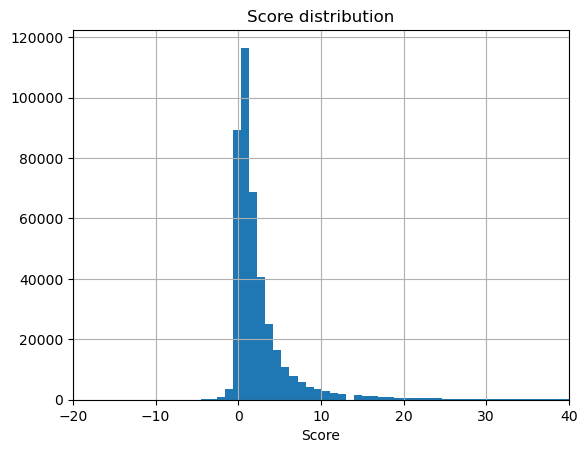

In [20]:
df_posts['Score'].hist(bins=2000)
plt.xlim(left=-20, right=40)
plt.title('Score distribution')
plt.xlabel('Score')
plt.show()

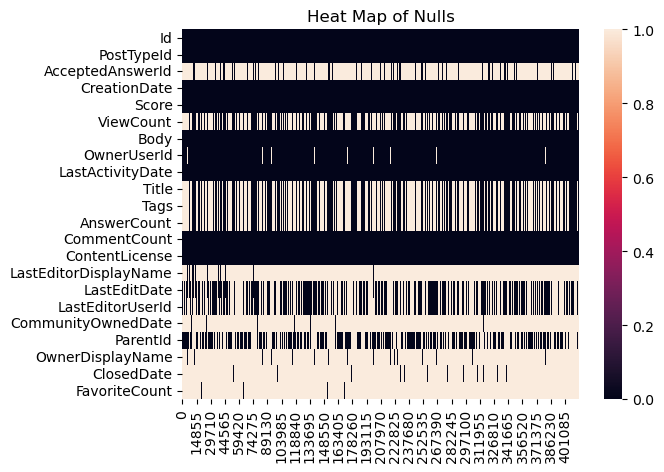

In [18]:
sns.heatmap(df_posts.isnull().T, cbar=True)
plt.title('Heat Map of Nulls')
plt.show()

In [21]:
means = df_posts.select_dtypes(include=['number']).mean().round(1)

In [24]:
means = means[means<5000]
means

PostTypeId          1.5
Score               3.3
ViewCount        2166.6
AnswerCount         1.0
CommentCount        1.9
FavoriteCount       0.0
dtype: float64

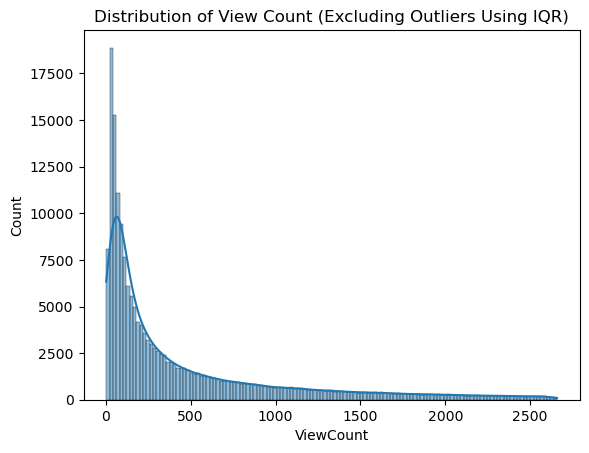

In [31]:
# Calculate Q1, Q3, and IQR
Q1 = df_posts['ViewCount'].quantile(0.25)
Q3 = df_posts['ViewCount'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the data to exclude outliers
filtered_data = df_posts[(df_posts['ViewCount'] >= lower_bound) & (df_posts['ViewCount'] <= upper_bound)]

# Plot the filtered data
sns.histplot(data=filtered_data, x='ViewCount', kde=True)
plt.title("Distribution of View Count (Excluding Outliers Using IQR)")
plt.show()

In [38]:
columns = df_posts.columns
columns

Index(['Id', 'PostTypeId', 'AcceptedAnswerId', 'CreationDate', 'Score',
       'ViewCount', 'Body', 'OwnerUserId', 'LastActivityDate', 'Title', 'Tags',
       'AnswerCount', 'CommentCount', 'ContentLicense',
       'LastEditorDisplayName', 'LastEditDate', 'LastEditorUserId',
       'CommunityOwnedDate', 'ParentId', 'OwnerDisplayName', 'ClosedDate',
       'FavoriteCount'],
      dtype='object')

In [39]:
columnsforcorr = ['Score','ViewCount','AnswerCount', 'CommentCount']

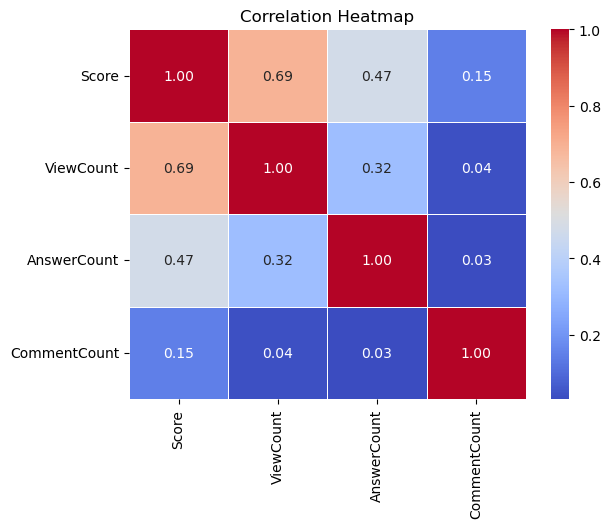

In [ ]:
corr_mat = df_posts[columnsforcorr].corr()
sns.heatmap(corr_mat, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

In [11]:
df_posts[df_posts['Id'].isin([625483, 509547])]


,Id,PostTypeId,AcceptedAnswerId,CreationDate,Score,ViewCount,Body,OwnerUserId,LastActivityDate,Title,Tags,AnswerCount,CommentCount,ContentLicense,LastEditorDisplayName,LastEditDate,LastEditorUserId,CommunityOwnedDate,ParentId,OwnerDisplayName,ClosedDate,FavoriteCount
338011,509547,1,510737.0,2021-02-15T12:17:43.203,3,733.0,"<p>I've recently been studying generative and discriminative models, and I had a question regarding text generation.</p>\n<p>I'm aware that generative models model <span class=""math-container"">$P(X, Y)$</span> and discriminative models model <span class=""math-container"">$P(Y | X)$</span>. I'm also aware that generative models are able to generate new samples of <span class=""math-container"">$(x_i, y_i)$</span>.</p>\n<p>If we had a text generation model (i.e., question generation, text summarization, etc.) then would this considered to be generative or discriminative?</p>\n<p>At first glance I would assume they're discriminative because the model is built on <span class=""math-container"">$P(Y | X)$</span>, but at the same time I'm not sure because they would also be able to generate new data samples.</p>\n",211707.0,2021-08-12T00:29:40.737,Are text generation models generative or discriminative?,<natural-language><generative-models><text-generation><discriminative-models>,1.0,1,CC BY-SA 4.0,None,2021-08-12T00:29:40.737,211707.0,None,NaN,None,None,NaN
415841,625483,1,NaN,2023-09-01T17:30:56.547,1,38.0,"<p>According to <a href=""https://en.wikipedia.org/wiki/Generative_model"" rel=""nofollow noreferrer"">Wikipedia</a>:</p>\n<p>A generative model is a statistical model of the joint probability distribution <span class=""math-container"">$P ( X , Y )$</span> on given observable variable <span class=""math-container"">$X$</span> and target variable <span class=""math-container"">$Y$</span>;</p>\n<p>A discriminative model is a model of the conditional probability <span class=""math-container"">$P ( Y ∣ X = x ) $</span>of the target <span class=""math-container"">$Y$</span>, given an observation <span class=""math-container"">$x$</span>.</p>\n<p>Based on this definition, How are autoregressive LLMs such as GPT series generative model, since they just model <span class=""math-container"">$P(X_t​∣X_1​,X_2​,…,X_t−1​)$</span> which is the second case.</p>\n<p>Edit: I found out that from the <a href=""https://d4mucfpksywv.cloudfront.net/better-language-models/language_models_are_unsupervised_multitask_learners.pdf"" rel=""nofollow noreferrer"">GPT-2 paper</a> that they do formulate it to model the joint distribution <span class=""math-container"">$ p(x) = \prod_{i=1}^{n} p(s_n|s_1, \ldots, s_{n-1}) $</span> (eq.1). So technically GPT series are generative models, although I am not quite sure how do they model <span class=""math-container"">$p(s_1)$</span> (essentially what makes it looks like a discriminative model).</p>\n",272776.0,2023-09-02T22:10:55.200,Why are LLMs generative models,<generative-models><llm><discriminative-models>,0.0,5,CC BY-SA 4.0,None,2023-09-02T22:10:55.200,272776.0,None,NaN,None,2023-09-03T01:30:33.197,NaN
